# H254-dry-01

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import cumulative_trapezoid

In [2]:
EXPID = 'H254-dry-01'
EXPTYPE = 'dry'
DATE = '2017-06-27'

## Load Data

Fix for slightly 'broken' logger timeline

In [3]:
SRATE = 1.0e5
DURATION = 5.0
index = np.arange(DURATION * SRATE) / SRATE

In [4]:
data = pd.read_csv(
    '../../data/sensors/2017-06-27_H254-dry-01.txt', skiprows=2, sep='\t',
    names=['trig', 'force', 'press', 'mic', 'el', 'seis'], index_col=0
)
data.index = index
data.index.name = 't'
data.force *= 1e3
data.press *= 1e6
data.head()

trig     force    press       mic        el      seis
t                                                                 
0.00000  0.360594 -18.16735 -5606.38 -0.000775  0.470744  0.008565
0.00001  0.002446 -16.87905 -5284.31 -0.000453  0.472677  0.007277
0.00002  0.010175 -17.52320 -5284.31 -0.000775  0.474287  0.005666
0.00003  0.011142 -17.84528 -5928.46 -0.003674  0.476220  0.004378
0.00004  0.012752 -16.87905 -5606.38 -0.002064  0.477830  0.004700

## Show Raw Data

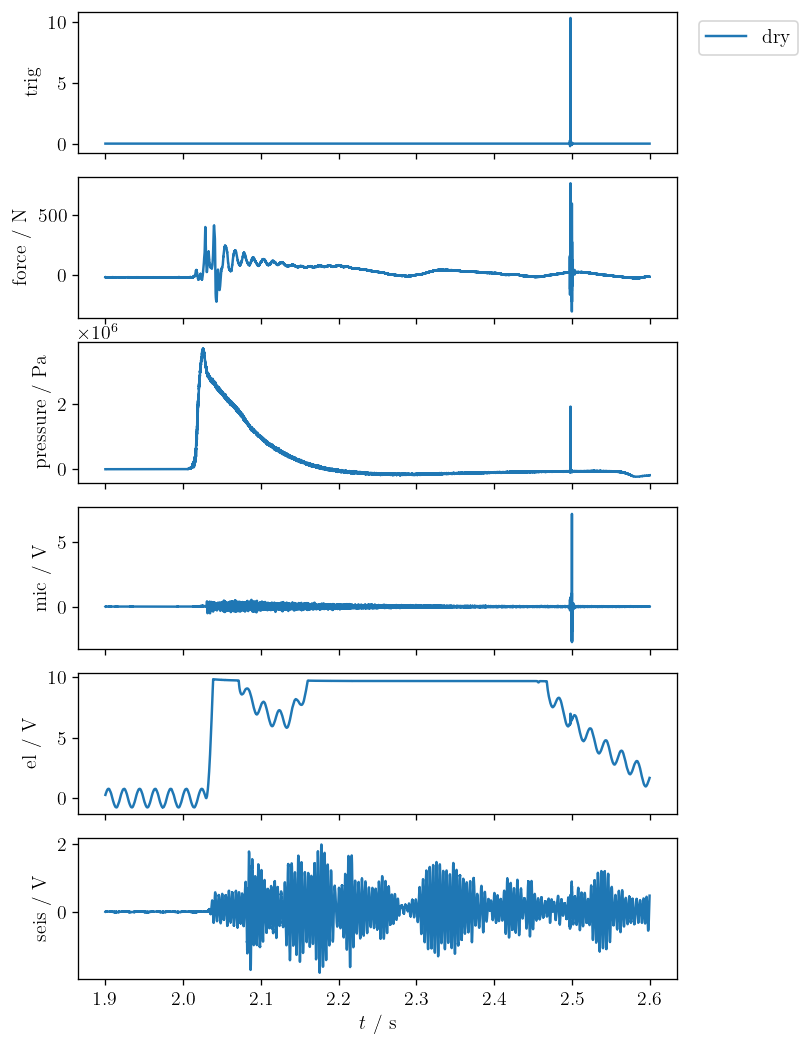

In [5]:
fig, axs = plt.subplots(nrows=6, sharex=True)

for ax, col in zip(axs, ['trig', 'force', 'press', 'mic', 'el', 'seis']):
    ax.plot(data.loc[1.9:2.6, col], label='dry')
axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1))
axs[-1].set(xlabel=r'$t\ /\ \mathrm{s}$')
for ax, lbl in zip(axs, ['trig', 'force / N', 'pressure / Pa', 'mic / V',
                         'el / V', 'seis / V']):
    ax.set_ylabel(lbl)
fig.set_size_inches(7, 9)
fig.tight_layout(pad=1, h_pad=0.)

- Interesting that the force signal hangs out above 0 for a while, even though the driving
  pressure is done by t=2.2s.
- Electric signal is saturated

In [6]:
ttrig = 1.987832
tspike = 2.4976296
tend = 2.4

## Summary Entries

### Summary

In [7]:
summ = pd.read_csv('../../data/summary.csv', index_col=0)
summ.loc[EXPID, 'exptype'] = EXPTYPE
summ.loc[EXPID, ['ttrig', 'tspike']] = [ttrig, tspike]
summ.loc[EXPID, ['Fmin', 'Fmax']] = data.force.min(), data.force.max()
summ.loc[EXPID, 'pmax'] = data.press.max()
summ

exptype     ttrig    tspike       Fmax        Fmin        pmax
expid                                                                      
H254-dry-01      dry  1.987832  2.497630  762.86767  -300.95021  3695706.76
H254-MFCI-03    ifci  1.987743  2.497569 -210.44680  1157.73400  4479971.00
billstein01     mfci  0.317654  0.579460  286.26030   -39.35883         NaN
billstein02     mfci  0.317585  0.579495  679.03260   -86.86507         NaN
billstein03     mfci  0.317615  0.579465  177.55950   -37.42638         NaN

### asdf

In [9]:
import asdf

In [11]:
tree = {
    'id': EXPID,
    'exptype': EXPTYPE,
    'date': DATE,
    'srate': SRATE,
    'summ': dict(summ.loc[EXPID]),
    'fields': ['t'] + list(data.columns),
    'units': ['s', 'V', 'N', 'Pa', 'V', 'V', 'V'],
    'time': {'ttrig': ttrig, 'tspike': tspike, 't': data.index.values},
}
for col in data.columns:
    tree[col] = data[col].values
af = asdf.AsdfFile(tree)